In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
len(train_images), len(test_images)

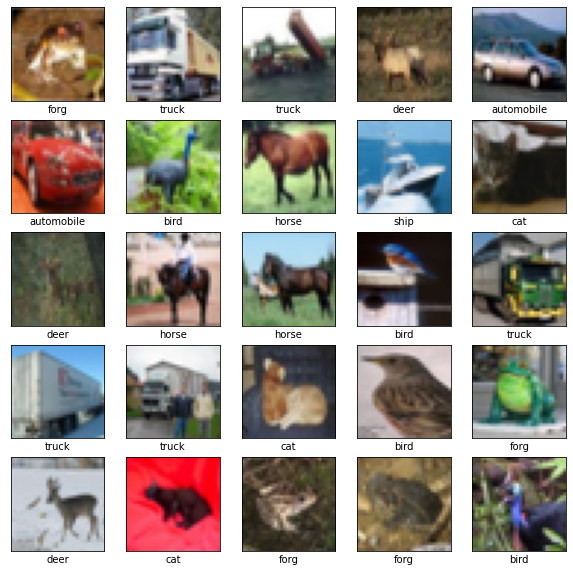

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'forg', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5325 - accuracy: 0.4408 - val_loss: 1.2591 - val_accuracy: 0.5400
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1605 - accuracy: 0.5908 - val_loss: 1.1357 - val_accuracy: 0.5930
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0033 - accuracy: 0.6484 - val_loss: 1.0305 - val_accuracy: 0.6334
Epoch 4/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.9096 - accuracy: 0.6807 - val_loss: 1.0547 - val_accuracy: 0.6316
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8367 - accuracy: 0.7061 - val_loss: 0.9011 - val_accuracy: 0.6874
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7852 - accuracy: 0.7256 - val_loss: 0.9665 - val_accuracy: 0.6746
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7327 - accuracy: 0.7441 - val_loss: 0.8930 -

313/313 - 4s - loss: 0.8462 - accuracy: 0.7127


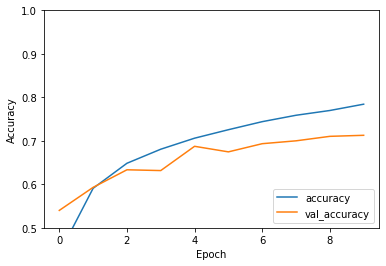

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [14]:
print(test_loss)
print(test_acc)

0.8461582064628601
0.7127000093460083


In [17]:
import tensorflow as tf

t = tf.constant([[1,2,3],[4,5,6],[7,8,9]])
pad = tf.constant([[1,1],[1,1]]) # 상 하 좌 우
print(t)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [18]:
print(tf.pad(t, pad, "CONSTANT"))

tf.Tensor(
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)
